#  Разворачивание и публикация моделей. Streamlit.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://docs.streamlit.io/get-started
* https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=meJ36PefNftd
* https://www.youtube.com/playlist?list=PLtqF5YXg7GLmCvTswG32NqQypOuYkPRUE
* https://docs.streamlit.io/develop/api-reference/widgets/st.slider
* https://docs.streamlit.io/develop/api-reference/media/st.image
* https://docs.streamlit.io/develop/api-reference/widgets/st.file_uploader
* https://docs.streamlit.io/develop/api-reference/caching-and-state/st.session_state

## Задачи для совместного разбора

Запуск приложений для заданий ниже
> streamlit run ./app.py

1\. Обсудите базовые возможности по созданию веб-приложения при помощи `streamlit` на примере построения графика функции $y=x^p, x\in[-x_{min}, x_{max}]$.

In [94]:
%%writefile app.py

import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def plot(x_min, x_max, power):
    x = np.linspace(x_min, x_max, 200)
    y = x ** power
    plt.figure(figsize=(10, 5))
    plt.plot(x, y)
    return plt

def main():
    st.title('Пример визуализации')

    x_min = st.sidebar.slider('Минимум', min_value=-5, max_value=5)
    x_max = st.sidebar.slider('Максимум', min_value=-5, max_value=5)
    power = st.sidebar.slider('Степень', min_value=-5, max_value=5)

    fig = plot(x_min, x_max, power)
    st.pyplot(fig)

# def main():
#     img_file = st.file_uploader(
#         label='Изображение'
#     )

#     if img_file is not None:
#         img = Image.open(img_file)
#         st.image(img)

if __name__ == '__main__':
    main()

Overwriting app.py


2\. Обсудите способ загрузки изображений и хранения переменных в сессии пользователя.

## Задачи для самостоятельного решения

<p class='task' id='1'></p>

1\. Напишите функцию `load_model`, которая восстанавливает модель предсказания категорий животных на основе пути к файлу с весами этой модели и любой другой дополнительной информации, которая требуется для восстановления модели. Загрузите модель и выведите ее архитектуру на экран.

- [ ] Проверено на семинаре

In [42]:
from pathlib import Path
from torch import nn, optim
import torch as th

def load_model(weights_path: Path, *args, **kwargs) -> nn.Module:
    model = th.load(weights_path, weights_only=False, *args, **kwargs)
    return model

In [43]:
model = load_model('./classification_model.pth', map_location=th.device('cpu'))

In [44]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

<p class='task' id='2'></p>

2\. Напишите функцию `preprocess_image`, которая принимает на вход изображение в виде `PIL.Image.Image` и предобрабатывает его таким образом, чтобы результат можно было пропустить через модель. Преобразования, применяемые к изображению, должны соответствовать тому, как данная модель была обучена.

Протестируйте работу функции, скачав картинку с котиком при помощи готовой функции `get_cat_image`.

- [ ] Проверено на семинаре

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import torchvision.models as models
import torchvision.transforms as transforms

def get_cat_image(url: str) -> Image.Image:
    response = requests.get(url)
    if response.status_code == 200:
        image = Image.open(BytesIO(response.content))
        return image
    else:
        return None

def preprocess_image(image: Image.Image) -> Image.Image:
    transform = models.VGG16_Weights.IMAGENET1K_V1.transforms()
    image_transformed = transform(image)
    return image_transformed

url = 'https://www.catster.com/wp-content/uploads/2023/11/Fawn-Sphynx_sophiecat_Shutterstock-800x592.jpg'
img = get_cat_image(url)
img_tr = preprocess_image(img)

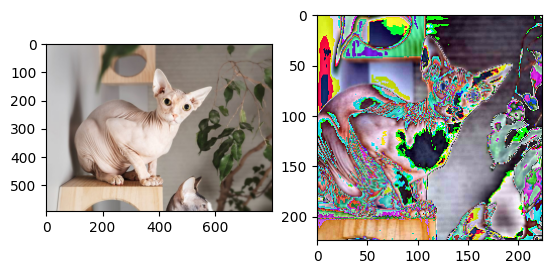

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline

to_pil = transforms.ToPILImage()
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img)
ax[1].imshow(to_pil(img_tr))
plt.show()

<p class='task' id='3'></p>

3\. Напишите функцию `predict`, при помощи которой можно получить прогноз для изображения. Продемонстируйте работу функции.

- [ ] Проверено на семинаре

In [92]:
def predict(model, image):
    model.eval()
    with th.no_grad():
        image = image.unsqueeze(0)
        outputs = model(image)
        _, predicted = th.max(outputs, 1)
    return predicted.item()

In [93]:
predict(model, img_tr)

0

<p class='task' id='4'></p>

4\. Реализуйте веб-приложение, которое позволяет загрузить изображение и получить прогноз для него при помощи обученной модели. На странице должны располагаться следующие визуальные элементы:
- кнопка для загрузки изображения;
- само изображение (после загрузки);
- кнопка для получения прогнозов;
- таблица с вероятностями каждого класса (после нажатия на кнопку): должны быть видны названия классов.

Продемонстрируйте работу, вставив в ячейку скриншоты, подтверждающие корректность решения.

В этом и следующем задании использование `streamlit` является опциональным. Если вы владеете любым другим инструментом для создания веб-приложения, вы можете использовать его.

- [ ] Проверено на семинаре

In [108]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch as th
from torchvision import models
from pathlib import Path

def load_model(weights_path: Path, *args, **kwargs) -> th.nn.Module:
    model = th.load(weights_path, weights_only=False, *args, **kwargs)
    model.eval()
    return model

def preprocess_image(image: Image.Image) -> th.Tensor:
    transform = models.VGG16_Weights.IMAGENET1K_V1.transforms()
    image_transformed = transform(image)
    return image_transformed

def predict(model, image) -> (th.Tensor, th.Tensor):
    with th.no_grad():
        image = image.unsqueeze(0)
        outputs = model(image)
        probabilities = th.nn.functional.softmax(outputs, dim=1).squeeze()
    return probabilities, th.argmax(probabilities)

def main():
    st.title('Классификация Изображений')
    
    img_file = st.file_uploader(label='Загрузите изображение', type=['jpg', 'jpeg', 'png'])

    device = th.device('cuda' if th.cuda.is_available() else 'cpu')
    model = load_model(Path('./classification_model.pth'), map_location=device)
    class_names = ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']

    if img_file is not None:
        img = Image.open(img_file).convert('RGB')
        st.image(img, caption='Загруженное изображение', use_column_width=True)

        pred_button = st.button('Получить прогноз')

        if pred_button:
            img_pr = preprocess_image(img).to(device)
            probabilities, img_class = predict(model, img_pr)

            probs_np = probabilities.cpu().numpy()
            df = pd.DataFrame({
                'Класс': class_names,
                'Вероятность': probs_np
            })
            df_sorted = df.sort_values(by='Вероятность', ascending=False).reset_index(drop=True)
            st.dataframe(df_sorted)
            
            st.success(f'Предсказанный класс: {class_names[img_class]} с вероятностью {probs_np[img_class]:.4f}')

if __name__ == '__main__':
    main()

Overwriting app.py


![Снимок экрана 2024-11-06 в 23.56.43.png](<attachment:Снимок экрана 2024-11-06 в 23.56.43.png>)
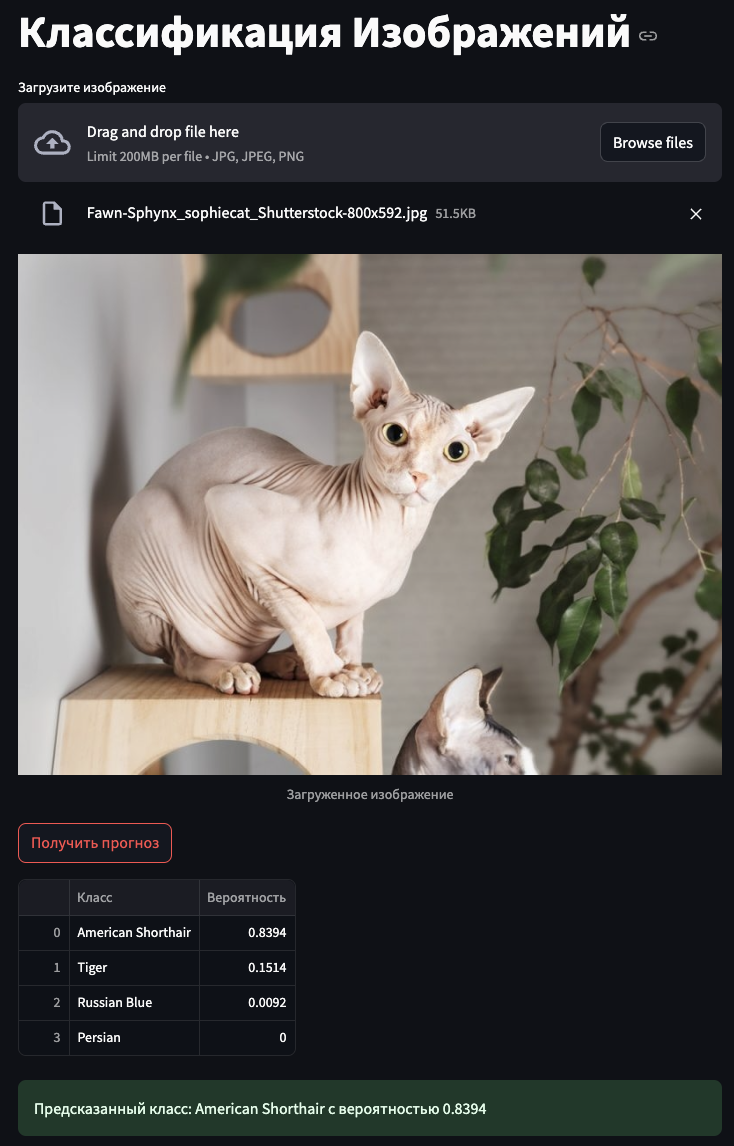

<p class='task' id='5'></p>

5\. Расширьте возможности приложения, добавив возможность отобразить информацию о топ-k наиболее вероятных классов в виде столбчатой диаграммы. Значение k должно выбираться при помощи визуального элемента 'слайдер'.

Продемонстрируйте работу, вставив в ячейку скриншоты, подтверждающие корректность решения.

- [ ] Проверено на семинаре

In [131]:
%%writefile app.py

import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch as th
from torchvision import models
from pathlib import Path

def load_model(weights_path: Path, *args, **kwargs) -> th.nn.Module:
    model = th.load(weights_path, weights_only=False, *args, **kwargs)
    model.eval()
    return model

def preprocess_image(image: Image.Image) -> th.Tensor:
    transform = models.VGG16_Weights.IMAGENET1K_V1.transforms()
    image_transformed = transform(image)
    return image_transformed

def predict(model, image) -> (th.Tensor, th.Tensor):
    with th.no_grad():
        image = image.unsqueeze(0)
        outputs = model(image)
        probabilities = th.nn.functional.softmax(outputs, dim=1).squeeze()
    return probabilities, th.argmax(probabilities)

def main():
    st.title('Классификация Изображений')
    
    img_file = st.file_uploader(label='Загрузите изображение', type=['jpg', 'jpeg', 'png'])

    device = th.device('cuda' if th.cuda.is_available() else 'cpu')
    model = load_model(Path('./classification_model.pth'), map_location=device)
    class_names = ['American Shorthair', 'Persian', 'Russian Blue', 'Tiger']

    if img_file is not None:
        img = Image.open(img_file).convert('RGB')
        st.image(img, caption='Загруженное изображение', use_column_width=True)

        if 'probabilities' not in st.session_state:
            st.session_state.probabilities = None
            st.session_state.img_class = None

        pred_button = st.button('Получить прогноз')

        if pred_button:
            img_pr = preprocess_image(img).to(device)
            probabilities, img_class = predict(model, img_pr)
            st.session_state.probabilities = probabilities.cpu().numpy()
            st.session_state.img_class = img_class.item()

        if st.session_state.probabilities is not None:
            top_k = st.sidebar.slider('Выберите количество топ-классов (k)', min_value=1, max_value=len(class_names), value=len(class_names))
            
            probs_np = st.session_state.probabilities
            img_class = st.session_state.img_class

            df = pd.DataFrame({
                'Класс': class_names,
                'Вероятность': probs_np
            })
            df_sorted = df.sort_values(by='Вероятность', ascending=False).reset_index(drop=True)
            st.dataframe(df_sorted.head(top_k))
            
            st.success(f'Предсказанный класс: {class_names[img_class]} с вероятностью {probs_np[img_class]:.4f}')

            fig, ax = plt.subplots()
            sns.barplot(x=df_sorted['Класс'].head(top_k), y=df_sorted['Вероятность'].head(top_k), ax=ax)
            ax.set_xlabel('Вероятность')
            ax.set_title(f'Топ-{top_k} классов')
            st.pyplot(fig)

if __name__ == '__main__':
    main()

Overwriting app.py


![Снимок экрана 2024-11-07 в 00.24.54.png](<attachment:Снимок экрана 2024-11-07 в 00.24.54.png>)
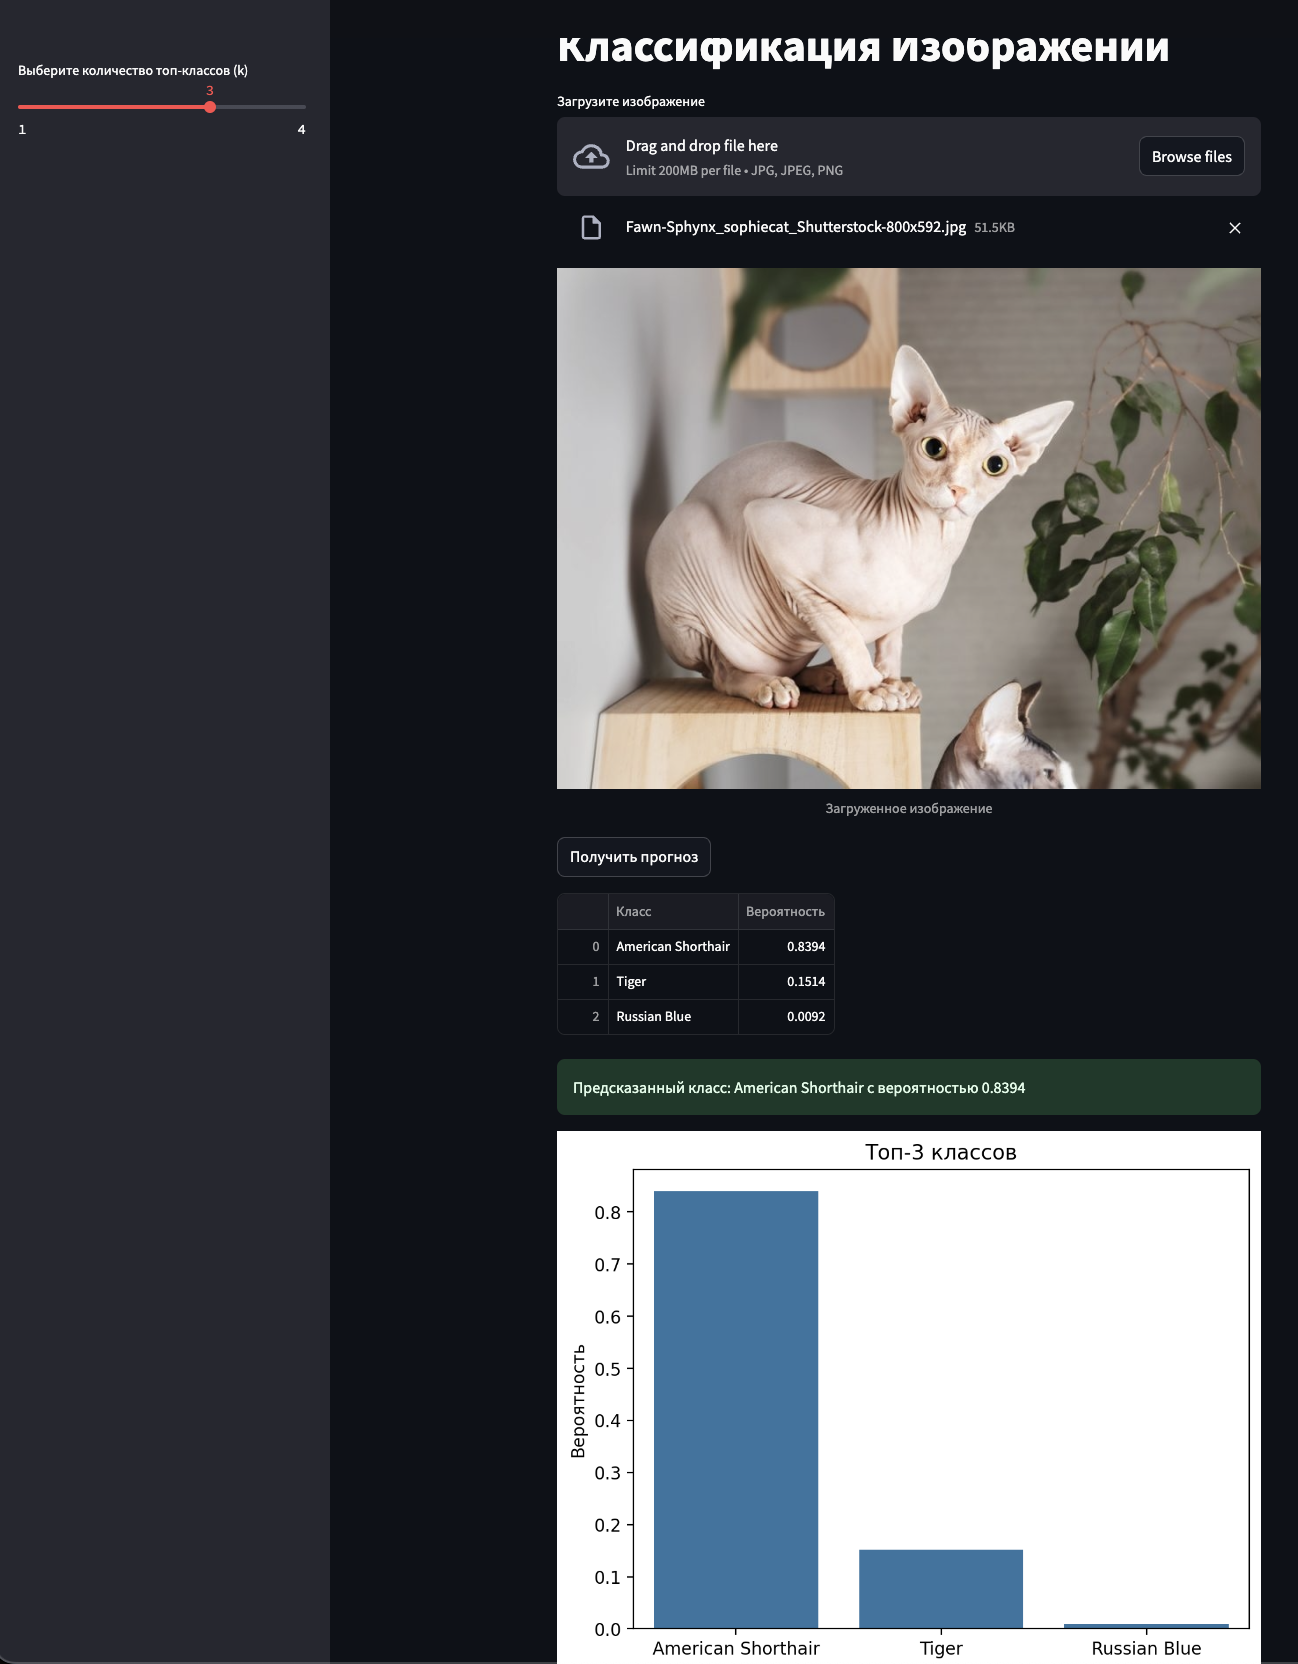